In [1]:
cd /content/drive/MyDrive/leadersd

/content/drive/MyDrive/leadersd


In [10]:
!unzip catdogs.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/d

In [11]:
import os
import shutil
import shutil
from tqdm.notebook import tqdm
print (min(os.listdir('train')))

cat.0.jpg


In [9]:
shutil.rmtree('train')

In [6]:
shutil.rmtree('cat')
shutil.rmtree('dog')
shutil.rmtree('cat_dog_test')
shutil.rmtree('cat_dog_train')

In [4]:
os.makedirs('cat_train')
os.makedirs('cat_test')
os.makedirs('dog_train')
os.makedirs('dog_test')

In [12]:
!ls

catdogs.zip  cat_test  cat_train  dog_test  dog_train  name.zip  train


In [13]:
print (len(os.listdir('train')))

25000


In [14]:
for namefile in tqdm((os.listdir('train'))):
  targ = namefile[:3]
  if (targ == "cat"):
    num = int(namefile[4:-4])
    if (num == 0):
      continue
    if (num > 11000):
      shutil.move(os.path.join('train', namefile), 'cat_test')
    else:
      shutil.move(os.path.join('train', namefile), 'cat_train')
  
  if (targ == "dog"):
    num = int(namefile[4:-4])
    if (num == 0):
      continue
    if (num > 11000):
      shutil.move(os.path.join('train', namefile), 'dog_test')
    else:
      shutil.move(os.path.join('train', namefile), 'dog_train')

  0%|          | 0/25000 [00:00<?, ?it/s]

In [22]:
print (min(os.listdir('cat_test')))

cat.11001.jpg


In [18]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

(280, 300, 3)


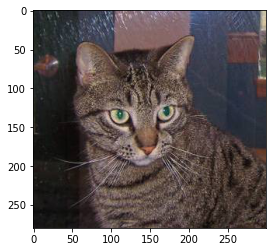

In [23]:
im = Image.open('cat_train/cat.1.jpg')
im = np.asarray(im)
plt.imshow(im)
print (im.shape)

In [69]:
import torchvision
import torch
from torchvision import transforms

def load_dataset(data_path):
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize((256, 256)),
                        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]) 

        ])
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return train_loader

In [25]:
os.mkdir('cat_dog_train')

In [41]:
!rm -r cat_dog_train/.ipynb_checkpoints

In [40]:
!ls -a cat_dog_train

cat  dog  .ipynb_checkpoints


In [27]:
shutil.move('cat_train', 'cat_dog_train')
shutil.move('dog_train', 'cat_dog_train')

'cat_dog_train/dog_train'

In [42]:
train_dataloader = load_dataset('cat_dog_train')

tensor(1)


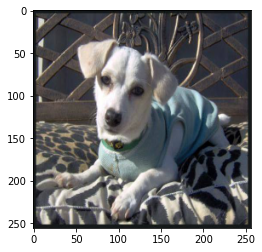

In [43]:
for batch_idx, (data, target) in enumerate(train_dataloader):
  print (target[0])
  pict = data[0].permute(1,2,0).detach().numpy()
  plt.imshow(pict)
  break

0 - кошка, 1-собака

In [94]:
model = torchvision.models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [45]:
print (len(list(model.parameters())[-1]))

1000


In [95]:
import torch.nn as nn
n_inputs = 512
n_classes = 2
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes))

In [96]:
print (model.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [99]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [71]:
torch.manual_seed(42)
image_transforms = {
    'train':
    transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  
    ]),
    'valid':
    transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [53]:
os.mkdir('cat_dog_test')
shutil.move('cat_test', 'cat_dog_test')
shutil.move('dog_test', 'cat_dog_test')

'cat_dog_test/dog_test'

In [102]:
ls

cat_dog_est/  cat_dog_test/   cat_dog_trest/  train/
catdogs.zip   cat_dog_train/  name.zip


In [59]:
data = {
    'train':
    torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/leadersd/cat_dog_train', transform=image_transforms['train']),
    'valid':
    torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/leadersd/cat_dog_test', transform=image_transforms['train'])
}

In [57]:
!ls -a cat_dog_test
!rm -r cat_dog_test/.ipynb_checkpoints/

cat  dog  .ipynb_checkpoints


In [101]:
a = torch.tensor([1, 0, 1])
b = torch.tensor([0, 1, 1])
acc(a,b)

0.3333333333333333

In [67]:
def acc(a, b):
  return sum(a==b).item()/a.shape[0]

In [70]:
train_load = load_dataset('/content/drive/MyDrive/leadersd/cat_dog_train')
test_data = load_dataset('/content/drive/MyDrive/leadersd/cat_dog_test')

In [104]:
torch.manual_seed(42)
model = model.to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
for epochs in range(10):
  model.train()
  for (data, target) in tqdm(train_load):
    data = data.to('cuda')
    target = target.to('cuda')
    optimizer.zero_grad()
    predict = model(data)
    loss = criterion(predict, target)
    loss.backward()
    optimizer.step()
  accuracy = []
  model.eval()
  for (data, target) in tqdm(test_data):
    data = data.to('cuda')
    target = target.to('cuda')
    predict = model(data)
    predict = torch.argmax(predict)
    accuracy.append(acc(predict, target))
  print(f'epoch = {epoch + 1}: {np.mean(accuracy)}')


  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

RuntimeError: ignored

In [97]:
model.train()
model(torch.zeros((1, 3, 256, 256)))

tensor([[-0.1120,  0.0785]], grad_fn=<AddmmBackward>)

In [111]:
accuracy = []

model.eval()
for (data, target) in tqdm(test_data):
  data = data.to('cuda')
  target = target.to('cuda')
  predict = model(data)
  predict = torch.argmax(predict, axis = 1)
  accuracy.append(acc(predict, target))
print(f'accuracy: {np.mean(accuracy)}')


  0%|          | 0/47 [00:00<?, ?it/s]

NameError: ignored

In [112]:
print (np.mean(accuracy))

0.9857047872340425


In [120]:
test_picture = next(iter(test_data))

In [121]:
print (test_picture[1])

tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])


In [122]:
picture = test_picture[0][0].unsqueeze(0)

In [123]:
picture.shape

torch.Size([1, 3, 256, 256])

In [126]:
print (model(test_picture[0].to('cuda')).argmax(axis = 1))

tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], device='cuda:0')


In [129]:
torch.save(model.state_dict(), '/content/drive/MyDrive/leadersd/model_cat_dogs.pt')

In [130]:
model_1 = torch.load('/content/drive/MyDrive/leadersd/model_cat_dogs.pt')
model_1.eval()
model_1 = model_1.to('cuda')

AttributeError: ignored

In [133]:
model_2 = torchvision.models.resnet34(pretrained=True) 
model_2.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes))
model_2.load_state_dict(torch.load('/content/drive/MyDrive/leadersd/model_cat_dogs.pt'))


<All keys matched successfully>

In [134]:
accuracy = []
model_2.to('cuda')
model_2.eval()
for (data, target) in tqdm(test_data):
  data = data.to('cuda')
  target = target.to('cuda')
  predict = model_2(data)
  predict = torch.argmax(predict, axis = 1)
  accuracy.append(acc(predict, target))
print(f'accuracy: {np.mean(accuracy)}')

  0%|          | 0/47 [00:00<?, ?it/s]

accuracy: 0.9856432230102443
